In [16]:
!pip install underthesea
!pip install langdetect
!pip install emoji
!pip install git+https://github.com/chienthan2vn/vietnamese-preprocess.git
!pip install transformers
!pip install googletrans==4.0.0-rc1
!pip install underthesea[deep]



  Cloning https://github.com/chienthan2vn/vietnamese-preprocess.git to /tmp/pip-req-build-you1m6i_
  Running command git clone --filter=blob:none --quiet https://github.com/chienthan2vn/vietnamese-preprocess.git /tmp/pip-req-build-you1m6i_
  Resolved https://github.com/chienthan2vn/vietnamese-preprocess.git to commit c3d082eb632653f55edf658965fa055518a47f08
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of underthesea[deep] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of underthesea[deep] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
#PIPELINE X·ª¨ L√ç
# def preprocessing_pipeline(text):
#     text = remove_emojis(text)                   # B1: Lo·∫°i emoji/icon
#     text = normalize_repeated_chars(text)        # B2: Chu·∫©n h√≥a t·ª´ b·ªã k√©o d√†i
#     text = replace_teencode_and_en(text)         # B3: Thay teencode
#     predictions = corrector(texts, max_length=MAX_LENGTH)  #B4: Ch·ªânh l·ªói ch√≠nh t·∫£ c√°c t·ª´
#     text = remove_gibberish(text)                # B5: Lo·∫°i t·ª´ v√¥ nghƒ©a
#                                                  #B6: ƒê·ªïi l·∫°i c√°c t·ª´ ti·∫øng anh -> ti·∫øng vi·ªát, b·ªè c√°c t·ª´ kh√¥ng ph·∫£i ti·∫øng vi·ªát (t·∫°m b·ªè)
#     text = underthesea.word_tokenize(text)       # B7: T√°ch t·ª´
#     return " ".join(text)


In [3]:
test_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_test.csv'
train_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_train.csv'
val_dataset = '/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/data_val.csv'

In [4]:
import pandas as pd
import re
from underthesea import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(train_dataset)
train_data = train['data']
test = pd.read_csv(test_dataset)
test_data = test['data']
val = pd.read_csv(val_dataset)
val_data = val['data']

In [ ]:
print(len(train))
print(len(test))
print(len(val))

12981
1623
1623


In [ ]:
train

data stayingpower  \
0      son ƒë·∫πp lƒÉm,s·∫Ω ·ªßng h·ªô ti·∫øp , shipper c≈©ng d·ªÖ t...          NaN   
1      Son ƒë·∫πp l·∫Øm nha mn tuy l√† son n·ªôi ƒë·ªãa gi√° r·∫ª n...          NaN   
2      Son m√†u l√™n chu·∫©n, ƒë·∫πp tuy nhi√™n d·ªÖ kh√¥ n√™n c·∫ß...          NaN   
3      C√¥ng d·ª•ng: r·∫•t ƒë·∫πp\nK·∫øt c·∫•u: t·ªët\nƒê·ªô b·ªÅn m√†u: ...     positive   
4      H√†ng g√≥i si√™u ch·∫Øc ch·∫Øn, packing xinh x·ªâu, ƒë·ªß ...          NaN   
...                                                  ...          ...   
12976  Sieu xinhh, b√™n ph·∫£i l√† son mafick, b√™n tr√°i l...          NaN   
12977  ƒê√≥ng g√≥i c·∫©n th·∫≠n, h√†ng giao nhanh, ch∆∞a d√πng ...          NaN   
12978  Son c√≥ m√πi l·∫° l·∫° sao √≠. L√∫c b√¥i l√™n m√¥i c·∫£m th...          NaN   
12979  Giao h√†ng nhanh, Son ƒë·∫∑t th·ª© 7 ƒë·∫øn th·ª© 2 giao ...     negative   
12980  Son ƒë·∫πp l·∫Øm nha t√¥ l√™n m·ªãn c·ª±c ƒë√≥ng g√≥i s·∫£n ph...          NaN   

        texture     smell     price   others    colour  shipping   packing  
0           NaN       NaN       NaN      NaN       NaN  positive       NaN  
1      positive  positive  positive      NaN       NaN       NaN       NaN  
2      negative       NaN       NaN      NaN  positive       NaN       NaN  
3      positive       NaN       NaN      NaN  positive       NaN       NaN  
4           NaN       NaN       NaN      NaN       NaN       NaN  positive  
...         ...       ...       ...      ...       ...       ...       ...  
12976       NaN       NaN       NaN  neutral       NaN       NaN       NaN  
12977       NaN       NaN       NaN      NaN       NaN  positive  positive  
12978  negative  negative       NaN      NaN       NaN       NaN       NaN  
12979       NaN       NaN       NaN      NaN       NaN  positive       NaN  
12980  positive       NaN       NaN      NaN       NaN  negative  positive  

[12981 rows x 9 columns]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LabNLP/cuoi ky/data/full_data.csv")

# Danh s√°ch c√°c aspect (b·ªè c·ªôt 'data')
aspects = df.columns.tolist()
aspects.remove('data')

==> Train


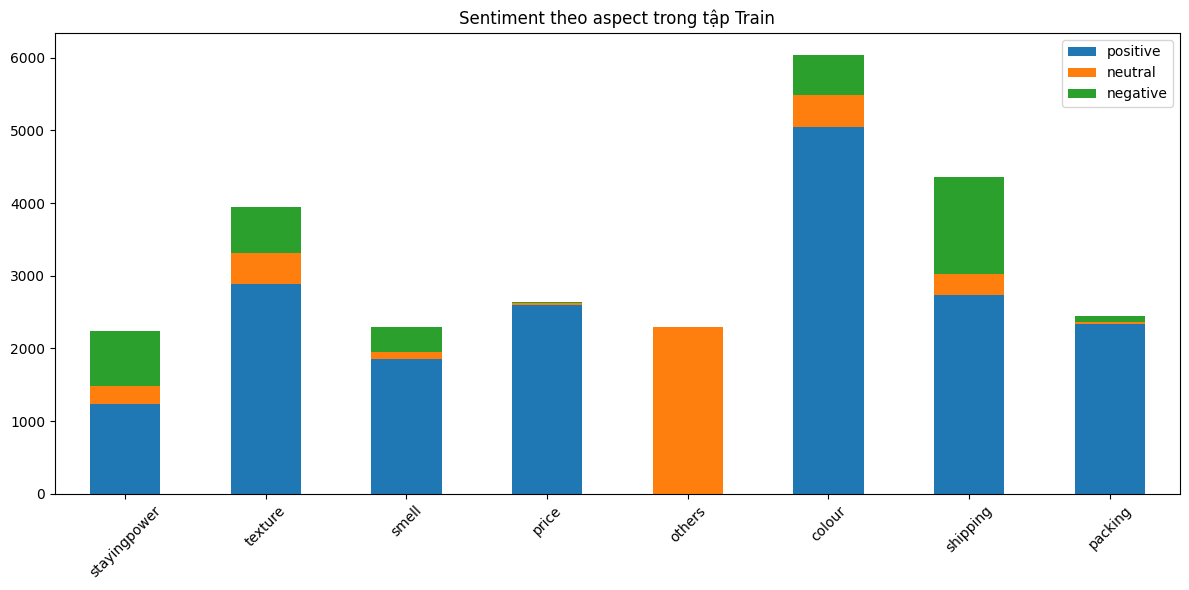

==> Validation


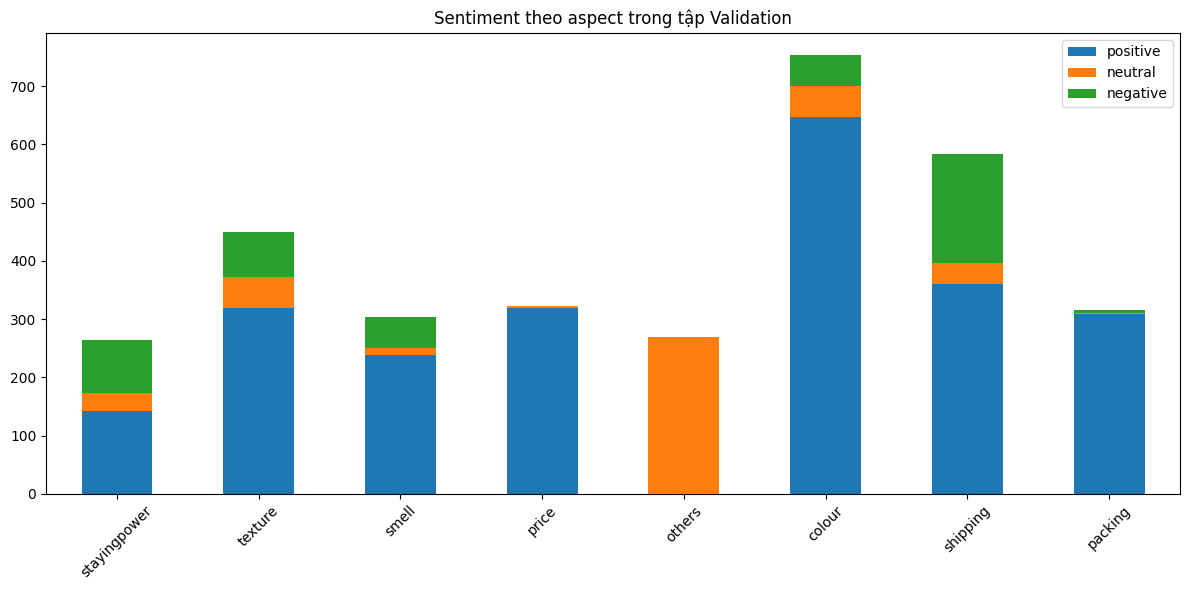

==> Test


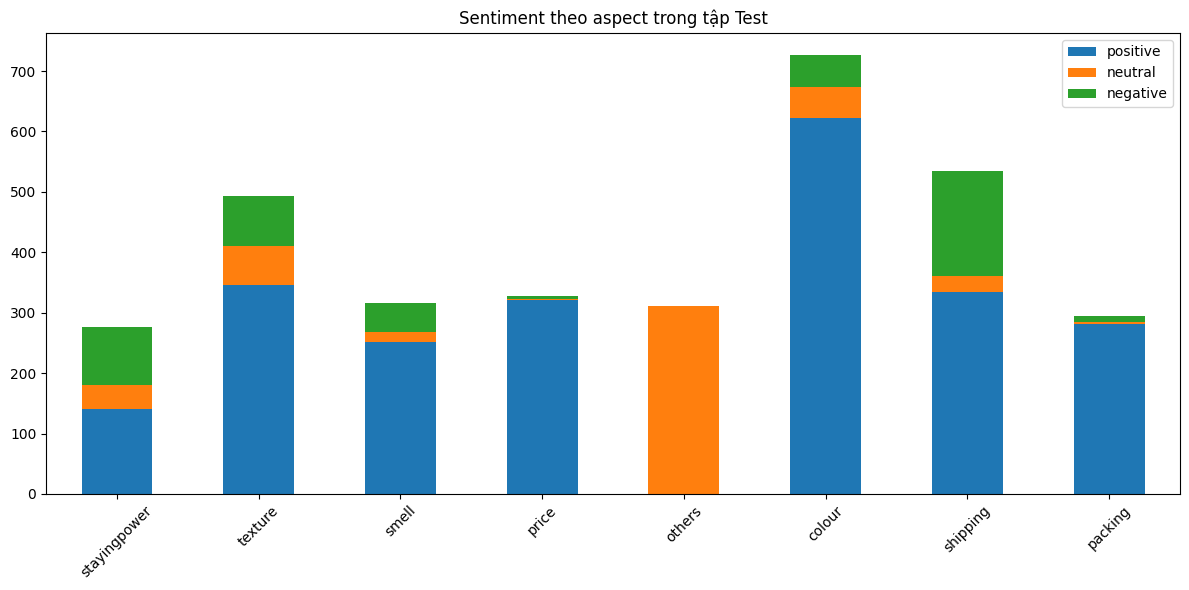

In [ ]:
for name, dataset in zip(['Train', 'Validation', 'Test'], [train, val, test]):
    print(f"==> {name}")
    counts = {aspect: dataset[aspect].value_counts() for aspect in aspects}
    df_sent = pd.DataFrame(counts).fillna(0).T
    df_sent[['positive', 'neutral', 'negative']].plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title(f"Sentiment theo aspect trong t·∫≠p {name}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

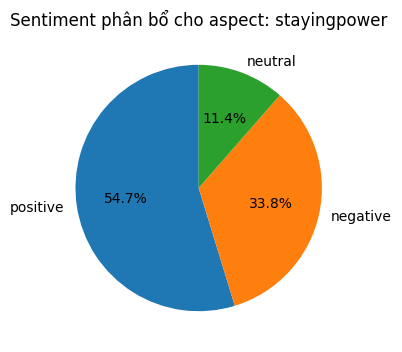

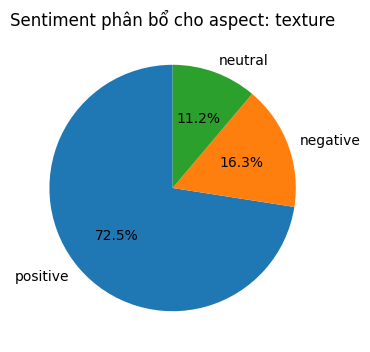

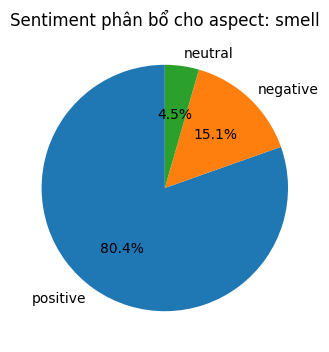

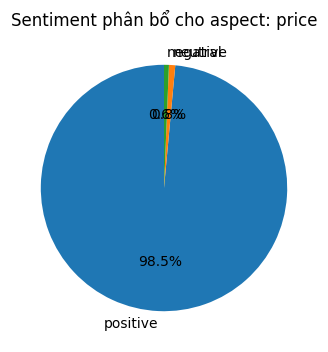

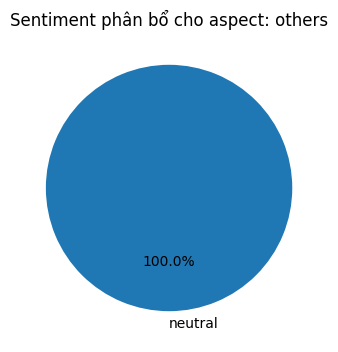

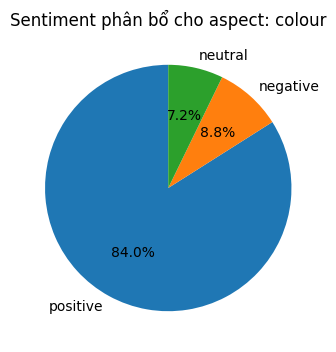

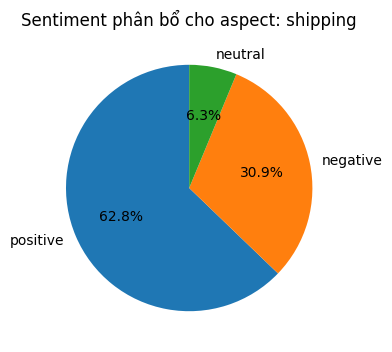

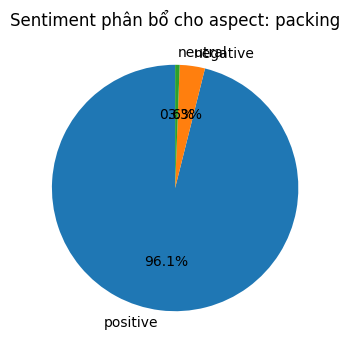

In [ ]:
for aspect in aspects:
    counts = df[aspect].value_counts()
    plt.figure(figsize=(4,4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Sentiment ph√¢n b·ªï cho aspect: {aspect}")
    plt.show()


In [ ]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)
val_data.to_csv('val.csv', index=False)

# Lo·∫°i b·ªè emoji

In [ ]:
import emoji
# H√†m x√≥a emoji kh·ªèi chu·ªói
def remove_emojis(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    return text  # Tr√°nh l·ªói n·∫øu gi√° tr·ªã kh√¥ng ph·∫£i chu·ªói

# H√†m x·ª≠ l√Ω c·ªôt 'data' c·ªßa DataFrame
def clean_dataframe_emojis(df, df_type):
    df = df.copy()
    before_emoji = df['data'].copy()
    df['data'] = df['data'].apply(remove_emojis)
    # So s√°nh
    changed_emoji = df[before_emoji != df['data']].index.tolist()
    # L∆∞u ra file
    with open(f"changed_index_emoji_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_emoji:
            f.write(str(idx) + "\n")
    return df

#Test
text = "H√¨nh ·∫£nh minh ho·∫° üå∏üå∏üíïüå∏üíïüå∏üíïüå∏üíïüå∏üíïüò≥üíïüå∏üíïüå∏üå∏üíïüå∏üå∏üíïüå∏üå∏üå∏üå∏üå∏üå∏"
cleaned_text = remove_emojis(text)
print(cleaned_text)

H√¨nh ·∫£nh minh ho·∫° 


In [ ]:
clean_emoji_df_train = clean_dataframe_emojis(train, 'train')
clean_emoji_df_test = clean_dataframe_emojis(test, 'test')
clean_emoji_df_val = clean_dataframe_emojis(val, 'val')

In [ ]:
print(len(clean_emoji_df_train))
print(len(clean_emoji_df_test))
print(len(clean_emoji_df_val))

12981
1623
1623


In [ ]:
clean_emoji_df_train.to_csv('train_emoji_clean.csv', index=False)


ƒê√°nh gi√°: ƒê√£ l·ªçc ƒë∆∞·ª£c h·∫øt c√°c emoji, tuy nhi√™n c√°c emoji g√µ tay nh∆∞: :))), ^_^,... V·∫´n ch∆∞a ƒë∆∞·ª£c l·ªçc

# Chu·∫©n h√≥a t·ª´ k√©o d√†i

In [ ]:
import re

def normalize_repeated_chars(text):
    if isinstance(text, str):
        # (\w)\1{2,} ‚Üí k√Ω t·ª± l·∫∑p l·∫°i √≠t nh·∫•t 3 l·∫ßn ‚Üí gi·ªØ l·∫°i 1 l·∫ßn
        return re.sub(r'(\w)\1{2,}', r'\1', text)
    return text

def normalize_repeated_chars_df(df, df_type):
    df = df.copy()
    before_long = df['data'].copy()
    df['data'] = df['data'].apply(normalize_repeated_chars)
    # So s√°nh
    changed_long = df[before_long != df['data']].index.tolist()
    # L∆∞u ra file
    with open(f"changed_index_long_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_long:
            f.write(str(idx) + "\n")
    return df

#Test
text = "ƒê·∫πp son l√¨ ..................aaaaaaaaaaaaaaaaaaaaaaaaa, Son xinh m·ªãn m√¥i giao h√†ng nhanh v·ªè son c≈©ng xinh okkkkkkkkkkkkkkkk m√¨nh test theo th·ª© t·ª± nha"
cleaned_text = normalize_repeated_chars(text)
print(cleaned_text)

ƒê·∫πp son l√¨ ..................a, Son xinh m·ªãn m√¥i giao h√†ng nhanh v·ªè son c≈©ng xinh ok m√¨nh test theo th·ª© t·ª± nha


In [ ]:
text = 'son r·∫ª n√™n ƒë√°nh ch∆°i th√¥i m√† c≈©ng ƒë·∫πpggffggffffgggggggggggggg'
cleaned_text = normalize_repeated_chars(text)
print(cleaned_text)

son r·∫ª n√™n ƒë√°nh ch∆°i th√¥i m√† c≈©ng ƒë·∫πpggffggfg


In [ ]:
# √Åp d·ª•ng h√†m x·ª≠ l√Ω
clean_long_df_train = normalize_repeated_chars_df(clean_emoji_df_train, 'train')
clean_long_df_test = normalize_repeated_chars_df(clean_emoji_df_test, 'test')
clean_long_df_val = normalize_repeated_chars_df(clean_emoji_df_val, 'val')

In [ ]:
print(len(clean_long_df_train))
print(len(clean_long_df_test))
print(len(clean_long_df_val))
clean_long_df_train.to_csv('train_long_clean.csv', index=False)

12981
1623
1623


ƒê√°nh gi√°: ph·∫ßn n√†y ·ªïn, ƒë√∫ng nh∆∞ mong mu·ªën
Tuy c√≥ 1 s·ªë c√°i ngo√†i t·∫ßm nh∆∞:
*   ·∫°aaaaaaaaaaaaaaaaa -> ·∫°a
*   √≠iiiiiiii -> √≠i

---


Kh√¥ng quan tr·ªçng l·∫Øm v√¨ sau ƒë√≥ c≈©ng s·∫Ω
ƒë∆∞·ª£c l·ªçc ƒëi




# Thay teencode, v√† 1 s·ªë t·ª´ ti·∫øng anh

In [ ]:
from vnpreprocess.utils.process import preprocessing, special_character
from tqdm import tqdm
#special_character d√πng ƒë·ªÉ b·ªè ?/><,... ƒë·∫∑c bi·ªát l√† nh·ªØng emoji d·∫°ng ch·ªØ nh∆∞ :)), :((

def preprocess_teencode(text):
    """
    X·ª≠ l√Ω teencode, t·ª´ vi·∫øt t·∫Øt, ti·∫øng Anh, chu·∫©n h√≥a unicode, d·∫•u c√¢u,...
    """
    if isinstance(text, str):

        return preprocessing(special_character(text))
    return text

def clean_teencode(df, df_type):
    df = df.copy()
    before = df['data'].copy()

    tqdm.pandas(desc="ƒêang x·ª≠ l√Ω teencode")
    df['data'] = df['data'].apply(preprocess_teencode)

    # Ghi l·∫°i ch·ªâ s·ªë d√≤ng thay ƒë·ªïi
    changed_idx = df[before != df['data']].index.tolist()

    # Ghi log index ra file
    with open(f"changed_index_teencode_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_idx:
            f.write(str(idx) + "\n")

    return df
#Test
text = "T thik cks ƒë√° b√≥ng v√†o m·ªói bu·ªïi chi·ªÅu (6h45) vs bb:>>>."
cleaned_text = preprocess_teencode(text)
print(cleaned_text)

tao th√≠ch ch∆°i ƒë√° b√≥ng v√†o m·ªói bu·ªïi chi·ªÅu 6h45 v·ªõi b·∫°n b√®


In [ ]:
# √Åp d·ª•ng h√†m x·ª≠ l√Ω
clean_teencode_df_train = clean_teencode(clean_long_df_train, 'train')
clean_teencode_df_test = clean_teencode(clean_long_df_test, 'test')
clean_teencode_df_val = clean_teencode(clean_long_df_val, 'val')

In [ ]:
clean_teencode_df_train.to_csv('train_teencode_clean.csv', index=False)
clean_teencode_df_test.to_csv('test_teencode_clean.csv', index=False)
clean_teencode_df_val.to_csv('val_teencode_clean.csv', index=False)

# Ch·ªânh ch√≠nh t·∫£

In [ ]:
from transformers import pipeline

corrector = pipeline("text2text-generation", model="bmd1905/vietnamese-correction-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/961 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

dict.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
from transformers import pipeline, logging
from tqdm import tqdm
logging.set_verbosity_error()  # ·∫®n c√°c warning t·ª´ transformers
# Kh·ªüi t·∫°o pipeline t·ª´ m√¥ h√¨nh correction
corrector = pipeline("text2text-generation", model="bmd1905/vietnamese-correction-v2")
MAX_LENGTH = 512
def correct_texts(texts, batch_size=4):
    """
    Nh·∫≠n danh s√°ch c√°c vƒÉn b·∫£n, tr·∫£ v·ªÅ danh s√°ch vƒÉn b·∫£n ƒë√£ ƒë∆∞·ª£c s·ª≠a l·ªói ch√≠nh t·∫£.
    """
    corrected_texts = []
    num_batches = (len(texts) + batch_size - 1) // batch_size

    for i in tqdm(range(0, len(texts), batch_size), total=num_batches, desc="ƒêang s·ª≠a vƒÉn b·∫£n"):
        batch = texts[i:i+batch_size]
        preds = corrector(batch, max_length=MAX_LENGTH)
        for text, pred in zip(texts, preds):
            corrected_texts.append(pred['generated_text'])
    return corrected_texts



In [ ]:
def correct_dataframe(df,df_type, column="data"):
    df = df.copy()
    before = df['data'].copy()
    original_texts = df[column].fillna("").tolist()
    df = df.drop(columns=[column])
    corrected = correct_texts(original_texts)
    df[column] = corrected

    changed_idx = df[before != df['data']].index.tolist()
    with open(f"changed_index_correction_{df_type}.txt", "w", encoding="utf-8") as f:
        for idx in changed_idx:
            f.write(str(idx) + "\n")

    return df


In [ ]:
#Test
text = ["toi dang l√† sinh di√™n nam hai ·ªü truong ƒë·∫° hoc khoa j·ªçc t·ª± nhi√™n , trogn nƒÉm ke tiep toi s·∫Ω ch·ªçn chuyen nganh v·ªÅ tr√≠ tue nhana t·∫°o"]
cleaned_text = correct_texts(text)
print(cleaned_text)

ƒêang s·ª≠a vƒÉn b·∫£n: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:01<00:00,  1.83s/it]

['T√¥i ƒëang l√† sinh vi√™n nƒÉm hai ·ªü tr∆∞·ªùng ƒë·∫°i h·ªçc khoa h·ªçc t·ª± nhi√™n , trong nƒÉm k·∫ø ti·∫øp t√¥i s·∫Ω ch·ªçn chuy√™n ng√†nh v·ªÅ tr√≠ tu·ªá nh√¢n t·∫°o.']


In [ ]:
df_test = pd.DataFrame({"data": text})
pd.set_option('display.max_colwidth', None)
df_clean = correct_dataframe(df_test, 'test')
print(df_clean)

ƒêang s·ª≠a vƒÉn b·∫£n: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  1.94it/s]

                                                                                                                                 data
0  T√¥i ƒëang l√† sinh vi√™n nƒÉm hai ·ªü tr∆∞·ªùng ƒë·∫°i h·ªçc khoa h·ªçc t·ª± nhi√™n , trong nƒÉm k·∫ø ti·∫øp t√¥i s·∫Ω ch·ªçn chuy√™n ng√†nh v·ªÅ tr√≠ tu·ªá nh√¢n t·∫°o.


In [ ]:
clean_teencode_df_train = pd.read_csv('train_teencode_clean.csv')
clean_teencode_df_test = pd.read_csv('test_teencode_clean.csv')
clean_teencode_df_val = pd.read_csv('val_teencode_clean.csv')

In [ ]:
# √Åp d·ª•ng h√†m x·ª≠ l√Ω
clean_correction_df_train = correct_dataframe(clean_teencode_df_train, 'train')
clean_correction_df_test = correct_dataframe(clean_teencode_df_test, 'test')
clean_correction_df_val = correct_dataframe(clean_teencode_df_val, 'val')

ƒêang s·ª≠a vƒÉn b·∫£n: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 406/406 [11:39<00:00,  1.72s/it]


In [ ]:
clean_correction_df_train.to_csv('train_correction_clean.csv', index=False)
clean_correction_df_test.to_csv('test_correction_clean.csv', index=False)
clean_correction_df_val.to_csv('val_correction_clean.csv', index=False)

# Lo·∫°i b·ªè t·ª´ v√¥ nghƒ©a

In [5]:
clean_correction_df_train = pd.read_csv('train_correction_clean.csv')
clean_correction_df_test = pd.read_csv('test_correction_clean.csv')
clean_correction_df_val = pd.read_csv('val_correction_clean.csv')

In [6]:
import re
from underthesea import word_tokenize

import re
from underthesea import word_tokenize

def is_valid_word(word):
    # Ki·ªÉm tra t·ª´ ch·ªâ ch·ª©a ch·ªØ c√°i ho·∫∑c ch·ªØ s·ªë (b·ªè qua _), ƒë·ªô d√†i h·ª£p l·ªá
    cleaned_word = word.replace("_", "")
    # Ch·∫•p nh·∫≠n t·ª´ ch·ª©a ch·ªØ c√°i, ch·ªØ s·ªë, ho·∫∑c k·∫øt h·ª£p (lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát kh√°c)
    return bool(re.match(r'^[\w]+$', cleaned_word, re.UNICODE)) and 1 <= len(word) <= 10

def remove_gibberish_from_sentence(text, gibberish_threshold=0.6):
    if not isinstance(text, str):
        return text

    # Ti·ªÅn x·ª≠ l√Ω: lo·∫°i b·ªè k√Ω t·ª± ƒë·∫∑c bi·ªát (tr·ª´ _, ch·ªØ, s·ªë, d·∫•u c√°ch)
    text = re.sub(r'[^\w\s_]', ' ', text)

    # Tokenize b·∫±ng underthesea
    words = word_tokenize(text, format="text").split()
    total = len(words)
    if total == 0:
        return ""

    # ƒê·∫øm s·ªë t·ª´ kh√¥ng h·ª£p l·ªá
    invalid_words = [w for w in words if not is_valid_word(w)]
    invalid_ratio = len(invalid_words) / total

    # N·∫øu t·ª∑ l·ªá t·ª´ kh√¥ng h·ª£p l·ªá v∆∞·ª£t ng∆∞·ª°ng ‚Üí tr·∫£ v·ªÅ None
    if invalid_ratio >= gibberish_threshold:
        return None

    # L·ªçc t·ª´ h·ª£p l·ªá v√† thay _ b·∫±ng d·∫•u c√°ch
    cleaned_words = [w.replace("_", " ") for w in words if is_valid_word(w)]
    return " ".join(cleaned_words)

def remove_gibberish_df(df):
    df = df.copy()
    df['data'] = df['data'].apply(remove_gibberish_from_sentence)
    # Option: b·ªè d√≤ng r·ªóng
    #df = df[df['data'].notna() & (df['data'].str.strip() != '')]
    return df

text = "C√¥ng d·ª•ng: r·∫•t ƒë·∫πp K·∫øt c·∫•u: t·ªët ƒê·ªô b·ªÅn m√†u: t·ªët Ch·∫•t son m·ªãn nh∆∞ng kh√¥ng b·ªã kh√¥ l√¢u tr√¥i m√¨nh th√≠ch m·∫ßu s·ªë 25 l√¢u tr√¥i ndndmdmdmfmdmmdmdmdndndndnnfnfnfnf"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "Son ƒë·∫πp l·∫Øm! Andnfjfjfksksndbdbdndndjdnfndmss"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "Obdhsjdbdhdjdjdjsgs dnkssushgdcsgsgshjsjsvevssnskjshsvshsjsj"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)
text = "son r·∫ª n√™n ƒë√°nh ch∆°i th√¥i m√† c≈©ng ƒë·∫πpggffggfg"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)

C√¥ng d·ª•ng r·∫•t ƒë·∫πp K·∫øt c·∫•u t·ªët ƒê·ªô b·ªÅn m√†u t·ªët Ch·∫•t son m·ªãn nh∆∞ng kh√¥ng b·ªã kh√¥ l√¢u tr√¥i m√¨nh th√≠ch m·∫ßu s·ªë 25 l√¢u tr√¥i
Son ƒë·∫πp l·∫Øm
None
son r·∫ª n√™n ƒë√°nh ch∆°i th√¥i m√† c≈©ng


In [7]:
text = "S·∫£n ph·∫©m ƒë∆∞·ª£c kh√≥a yvtvtvtvg vgvg g g tvvtvbgd vt g fj th·∫ø fbrfnrjfh fbrfnrjfh heh"
cleaned_text = remove_gibberish_from_sentence(text)
print(cleaned_text)

S·∫£n ph·∫©m ƒë∆∞·ª£c kh√≥a yvtvtvtvg vgvg g g tvvtvbgd vt g fj th·∫ø fbrfnrjfh fbrfnrjfh heh


In [8]:
# √Åp d·ª•ng h√†m x·ª≠ l√Ω
clean_nons_df_train = remove_gibberish_df(clean_correction_df_train)
clean_nons_df_test = remove_gibberish_df(clean_correction_df_test)
clean_nons_df_val = remove_gibberish_df(clean_correction_df_val)

In [9]:
print(len(clean_nons_df_train))
print(len(clean_nons_df_test))
print(len(clean_nons_df_val))
clean_nons_df_train.to_csv('train_nons_clean2.csv', index=False)
clean_nons_df_test.to_csv('test_nons_clean2.csv', index=False)
clean_nons_df_val.to_csv('val_nons_clean2.csv', index=False)

12981
1623
1623


#Sub ti·∫øng anh -> vi·ªát (t·∫°m b·ªè)

In [10]:
#s·ª≠ d·ª•ng th∆∞ vi·ªán Argos Translate, googletrans ƒë·ªÉ d·ªãch
#gi·ªØ l·∫°i t√™n nh√£n h√†ng SpaCy + m√¥ h√¨nh NER ()

In [14]:
# #Load m√¥ h√¨nh NER PhoBERT cho nh·∫≠n di·ªán t√™n c√°c nh√£n h√†ng
# from transformers import AutoTokenizer, AutoModelForTokenClassification
# from transformers import pipeline

# # Load tokenizer v√† model
# tokenizer = AutoTokenizer.from_pretrained("quocanh944/phoBERT-ner")
# model = AutoModelForTokenClassification.from_pretrained("quocanh944/phoBERT-ner")

# # T·∫°o pipeline NER
# ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")


Device set to use cuda:0


In [10]:
# def extract_named_entities(text, entity_types=["ORG", "MISC"]):
#     # N·∫øu chu·ªói qu√° d√†i, t·ª± gi·ªõi h·∫°n l·∫°i (PhoBERT h·ªó tr·ª£ max 256 tokens)
#     if len(text) > 200:
#         text = text[:200]

#     try:
#         entities = ner_pipeline(text)
#         results = [
#             ent['word'] for ent in entities
#             if ent['entity_group'] in entity_types
#         ]
#         return list(set(results))  # L·∫•y unique
#     except Exception as e:
#         print("L·ªói khi ch·∫°y NER:", e)
#         return []


In [2]:
# from underthesea import ner

# text = 'Ch∆∞a ti·∫øt l·ªô l·ªãch tr√¨nh t·ªõi Vi·ªát Nam c·ªßa T·ªïng th·ªëng M·ªπ Donald Trump'
# print(ner(text))


[('Ch∆∞a', 'R', 'O', 'O'), ('ti·∫øt l·ªô', 'V', 'B-VP', 'O'), ('l·ªãch tr√¨nh', 'V', 'B-VP', 'O'), ('t·ªõi', 'E', 'B-PP', 'O'), ('Vi·ªát Nam', 'Np', 'B-NP', 'B-LOC'), ('c·ªßa', 'E', 'B-PP', 'O'), ('T·ªïng th·ªëng', 'N', 'B-NP', 'B-LOC'), ('M·ªπ Donald Trump', 'Np', 'B-NP', 'I-LOC')]
